<a href="https://colab.research.google.com/github/annisastala/KLASIFIKASI-CNN/blob/main/KLASIFIKASI_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                       title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/social-media-addiction-vs-relationships       Students' Social Media Addiction                     7851  2025-05-10 14:38:02.713000           8290        120  1.0              
jayaantanaath/student-habits-vs-academic-performance      Student Habits vs Academic Performance              19512  2025-04-12 10:49:08.663000          36008        636  1.0              
rakeshkapilavai/extrovert-vs-introvert-behavior-data      Extrovert vs. Introvert Behavior Data               15392  2025-05-21 04:26:52.443000           1439         31  1.0              
atharvasoundankar/ai-developer-productivity-dataset    

In [ ]:
!kaggle datasets download -d'adesulastri/klasifikasi-buah'

Dataset URL: https://www.kaggle.com/datasets/adesulastri/klasifikasi-buah
License(s): unknown
klasifikasi-buah.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

In [ ]:
from zipfile import ZipFile
file_name = "/content/klasifikasi-buah.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models



In [ ]:
# --- 1. Path dan Parameter ---
data_dir = '/content/klasifikasiBuah'
img_height, img_width = 150, 150
batch_size = 32
epochs = 20
# --- 2. Preprocessing ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 368 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [ ]:
# --- 3. CNN Arsitektur ---
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])
# --- 4. Kompilasi Model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- 5. Training Model ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4800 - loss: 1.1377 - val_accuracy: 0.7283 - val_loss: 0.5326
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7873 - loss: 0.4578 - val_accuracy: 0.9565 - val_loss: 0.1921
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9488 - loss: 0.2264 - val_accuracy: 0.9783 - val_loss: 0.0551
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9718 - loss: 0.1180 - val_accuracy: 0.9891 - val_loss: 0.0353
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9847 - loss: 0.0950 - val_accuracy: 0.9891 - val_loss: 0.0453
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9769 - loss: 0.1016 - val_accuracy: 1.0000 - val_loss: 0.0271
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9832 - loss: 0.0763 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9911 - loss: 0.0371 - val_accuracy: 1.0000 - val_loss: 0.0064
Epo

In [ ]:
model.save("model_buah.h5")
print("✅ Model disimpan sebagai model_buah.h5")

✅ Model disimpan sebagai model_buah.h5


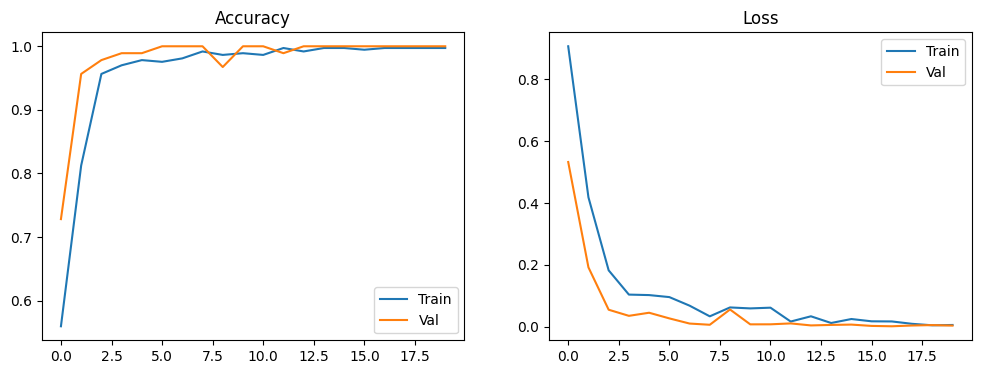

In [ ]:
# --- 6. Evaluasi ---
# Plot Learning Curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 371ms/step


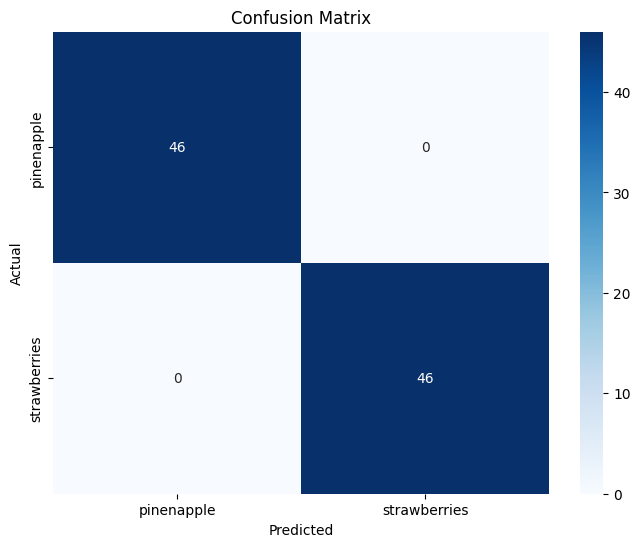

              precision    recall  f1-score   support

  pinenapple       1.00      1.00      1.00        46
strawberries       1.00      1.00      1.00        46

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [ ]:
# --- 7. Evaluasi Lanjut ---
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step


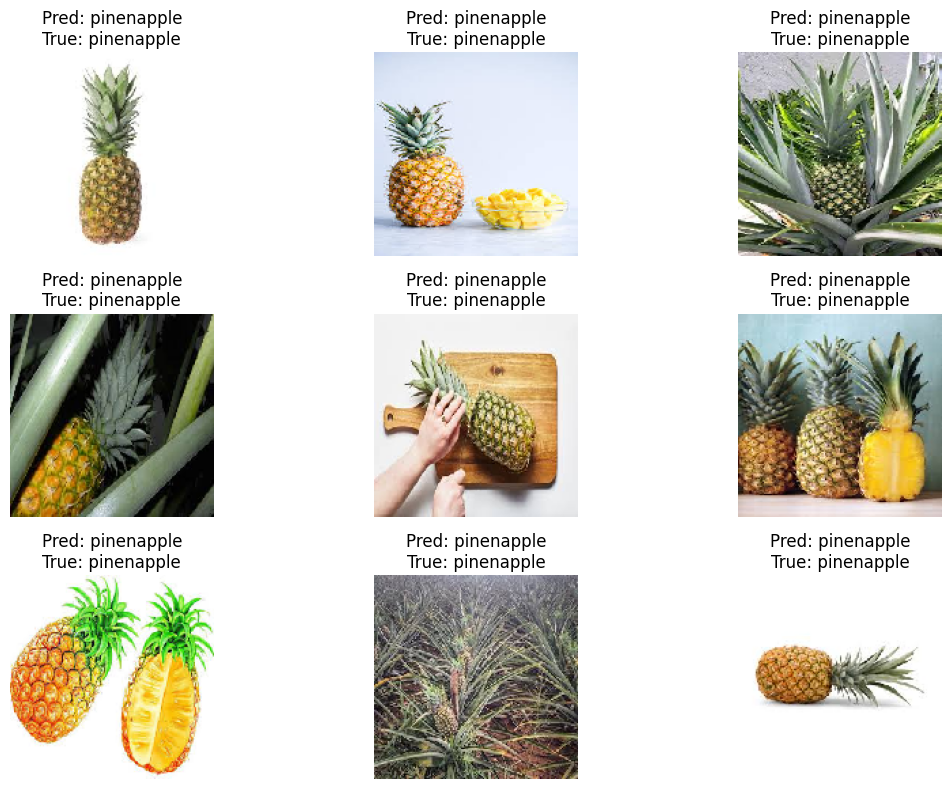

In [ ]:
# --- 8. Prediksi vs Aktual Visualisasi ---
sample_x, sample_y = next(val_generator)
preds = model.predict(sample_x)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(sample_y, axis=1)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_x[i])
    plt.axis('off')
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[true_labels[i]]}")
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload gambar dari lokal
uploaded = files.upload()

# Ambil nama file
img_path = next(iter(uploaded))
print("Gambar berhasil diupload:", img_path)

Saving POLA3-strw.jpg to POLA3-strw.jpg
Gambar berhasil diupload: POLA3-strw.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


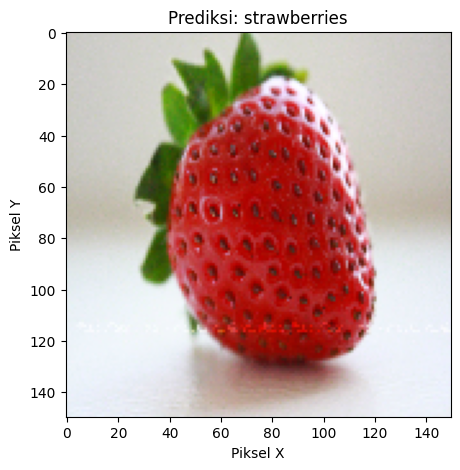

Hasil prediksi: strawberries


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_uploaded_image(img_path):
    # Load dan preprocess gambar
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = list(train_generator.class_indices.keys())[class_index]

    # Tampilkan gambar dan prediksi dengan "penggaris"
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Prediksi: {class_label}')
    plt.xlabel("Piksel X")
    plt.ylabel("Piksel Y")
    plt.grid(False)        # Opsional: tambahkan jika ingin grid
    plt.axis('on')         # Aktifkan penggaris (axis)
    plt.show()

    print(f"Hasil prediksi: {class_label}")

# Panggil fungsi ini seperti biasa
predict_uploaded_image(img_path)

In [3]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [1]:
import anvil.server
import anvil.media
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Koneksikan Uplink
anvil.server.connect("server_NN7N3VNR32O3CMI6R5YDNJM4-B6FU665PZN4NNJM4")

# Load model
model = load_model('model_buah.h5')
labels = ['pinenapple', 'strawberries']

@anvil.server.callable
def klasifikasi_gambar(file):
    with anvil.media.TempFile(file) as f:
        img = load_img(f, target_size=(150, 150))  # sesuai ukuran training
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        class_label = labels[class_index]

        print("Prediksi:", prediction)
        print("Label:", class_label)

        return class_label




Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER
